# Comparing Coronavirus and MERS viral genome

In [1]:
# Working with DB
import biotite.database.entrez as entrez

In [2]:
dir(entrez)

['CompositeQuery',
 'Query',
 'SimpleQuery',
 '__author__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'check',
 'dbnames',
 'download',
 'fetch',
 'fetch_single_file',
 'get_database_name',
 'query',
 'search']

In [4]:
# Get DB Name
entrez.get_database_name("Nucleotide")

'nuccore'

In [5]:
# Get DB Name for Protein
entrez.get_database_name("Protein")

'protein'

#### Downloading and parse protein sequence of Covid and Mers

In [6]:
covid_file_path = entrez.fetch("MN908947","viruses_path",suffix="fa",db_name="nuccore",ret_type="fasta")
mers_file_path = entrez.fetch("NC_019843.3","viruses_path",suffix="fa",db_name="nuccore",ret_type="fasta")

In [7]:
print(covid_file_path)
print(mers_file_path)

viruses_path\MN908947.fa
viruses_path\NC_019843.3.fa


In [13]:
# Reading Fasta files
import biotite.sequence as seq
import biotite.sequence.io.fasta as fasta

In [9]:
dir(fasta)

['FastaFile',
 '__author__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'convert',
 'file',
 'get_alignment',
 'get_sequence',
 'get_sequences',
 'set_alignment',
 'set_sequence',
 'set_sequences']

In [10]:
# Covid19
c_file = fasta.FastaFile()
c_file.read(covid_file_path)

In [11]:
print(c_file)

>MN908947.3 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome
ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAA
CGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAAC
TAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTG
TTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTC
CCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTAC
GTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGG
CTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGAT
GCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTC
GTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCT
TCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTA
GGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTG
TTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGG
CCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGT

In [12]:
# Mers
m_file = fasta.FastaFile()
m_file.read(mers_file_path)

In [14]:
# Covid19
for header,s in c_file.items():
    print(header)
    print(s)
    covid_seq = seq.NucleotideSequence(s)

MN908947.3 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome
ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGGCCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGTAAAGCTTCATGCA

In [15]:
# Mers
for header,s in m_file.items():
    print(header)
    print(s)
    mers_seq = seq.NucleotideSequence(s)

NC_019843.3 Middle East respiratory syndrome-related coronavirus isolate HCoV-EMC/2012, complete genome
GATTTAAGTGAATAGCTTGGCTATCTCACTTCCCCTCGTTCTCTTGCAGAACTTTGATTTTAACGAACTTAAATAAAAGCCCTGTTGTTTAGCGTATCGTTGCACTTGTCTGGTGGGATTGTGGCATTAATTTGCCTGCTCATCTAGGCAGTGGACATATGCTCAACACTGGGTATAATTCTAATTGAATACTATTTTTCAGTTAGAGCGTCGTGTCTCTTGTACGTCTCGGTCACAATACACGGTTTCGTCCGGTGCGTGGCAATTCGGGGCACATCATGTCTTTCGTGGCTGGTGTGACCGCGCAAGGTGCGCGCGGTACGTATCGAGCAGCGCTCAACTCTGAAAAACATCAAGACCATGTGTCTCTAACTGTGCCACTCTGTGGTTCAGGAAACCTGGTTGAAAAACTTTCACCATGGTTCATGGATGGCGAAAATGCCTATGAAGTGGTGAAGGCCATGTTACTTAAAAAGGAGCCACTTCTCTATGTGCCCATCCGGCTGGCTGGACACACTAGACACCTCCCAGGTCCTCGTGTGTACCTGGTTGAGAGGCTCATTGCTTGTGAAAATCCATTCATGGTTAACCAATTGGCTTATAGCTCTAGTGCAAATGGCAGCCTGGTTGGCACAACTTTGCAGGGCAAGCCTATTGGTATGTTCTTCCCTTATGACATCGAACTTGTCACAGGAAAGCAAAATATTCTCCTGCGCAAGTATGGCCGTGGTGGTTATCACTACACCCCATTCCACTATGAGCGAGACAACACCTCTTGCCCTGAGTGGATGGACGATTTTGAGGCGGATCCTAAAGGCAAATATGCCCAGAATCTGCTTAAGAAGTTGATTGGCGGTGATGTCACTCCAGTTGACCAATACATGTGTGGCGTTGAT

#### Comparing

+ Len
+ Freq
+ Alignment
+ GC

In [16]:
# Len of Seqs
print("Len of Covid: ", len(covid_seq))
print("Len of Mers: ", len(mers_seq))

Len of Covid:  29903
Len of Mers:  30119


In [17]:
# Freq of Seqs
print("Freq of Covid: ", covid_seq.get_symbol_frequency())
print("Freq of Mers: ", mers_seq.get_symbol_frequency())

Freq of Covid:  {'A': 8954, 'C': 5492, 'G': 5863, 'T': 9594}
Freq of Mers:  {'A': 7900, 'C': 6116, 'G': 6304, 'T': 9799}


In [18]:
# GC Content of DNA
def gc_content(s):
    return 100 * float(str(s).count("G") + str(s).count("C"))/len(s)

In [19]:
gc_content(covid_seq)

37.97277865097148

In [20]:
gc_content(mers_seq)

41.23642883229855

#### Plot

In [23]:
import matplotlib.pyplot as plt

In [21]:
freq_covid = covid_seq.get_symbol_frequency()
freq_mers  = mers_seq.get_symbol_frequency()

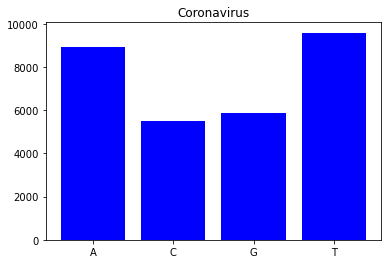

In [24]:
plt.bar(freq_covid.keys(), freq_covid.values(), color="blue")
plt.title("Coronavirus")
plt.show()

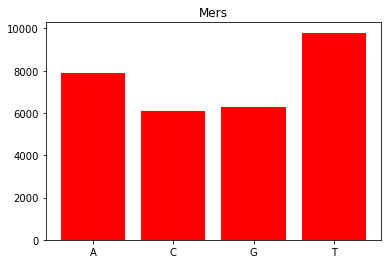

In [25]:
plt.bar(freq_mers.keys(), freq_mers.values(), color="Red")
plt.title("Mers")
plt.show()